# Analysis of Ar41 export by 2M Neutrons
In this notebook, we see the exportation of Ar41 events selected by the 2M neutrons simulation.

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [13]:
def load_dataframe_from_files(dirin, fileprefix, max_files=100):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [14]:
df = load_dataframe_from_files(".", "ExportAr41_1_*csv")

[Info] Loading 4 files wt prefix:
ExportAr41_1_*csv
...


In [21]:
edep_gby_event = df.groupby("eventnumber").energydeposition.sum()
edeplar_gby_event = df[df.SensitiveVolID==201].groupby("eventnumber").energydeposition.sum()
edepfib_gby_event = df[df.SensitiveVolID!=201].groupby("eventnumber").energydeposition.sum()

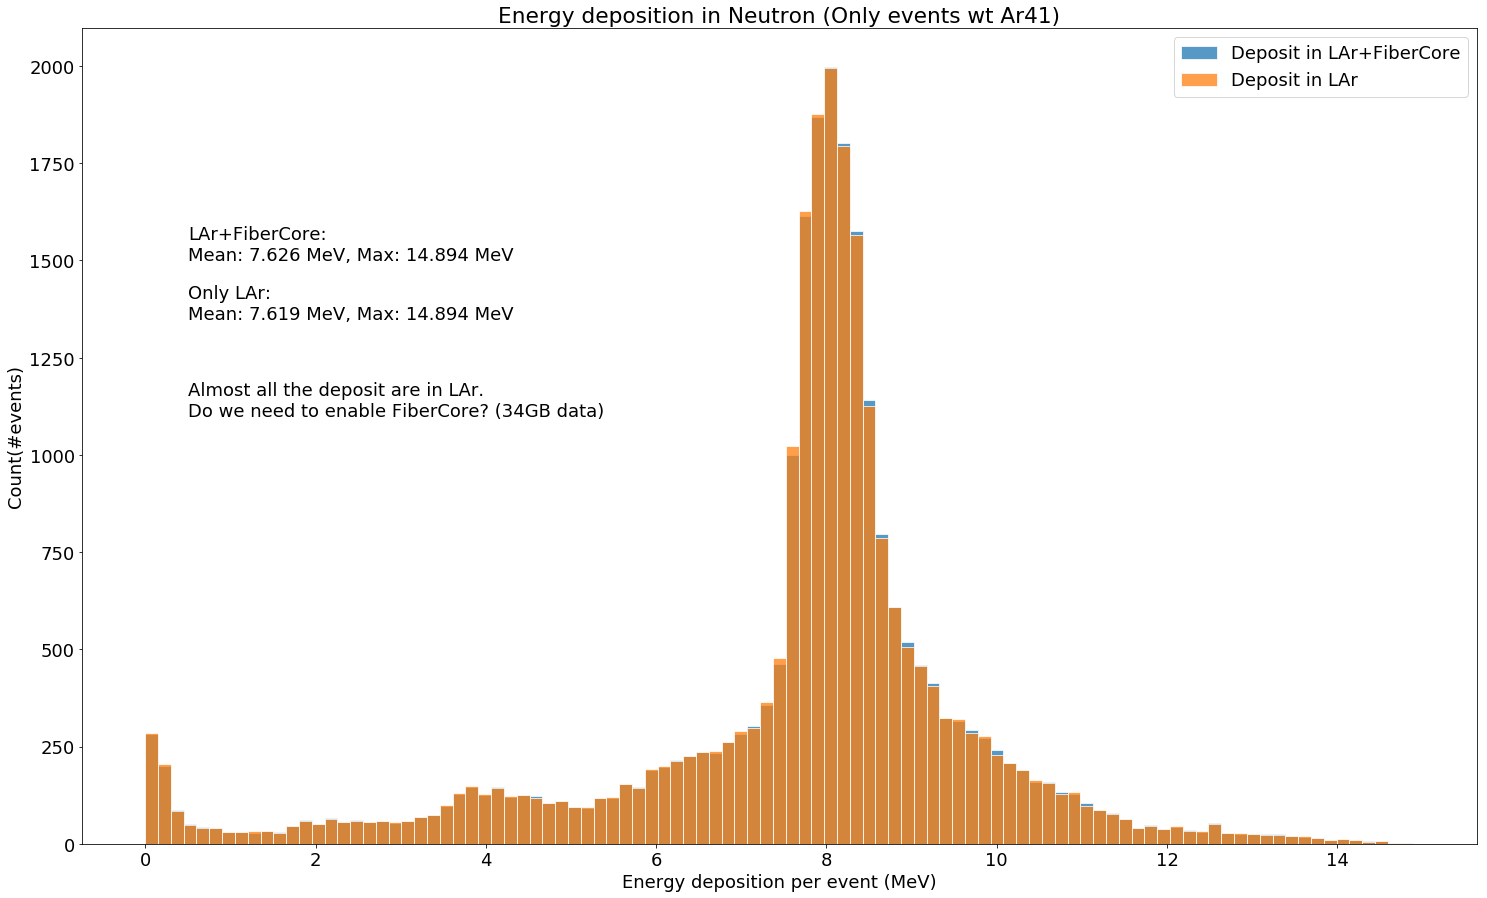

In [46]:
bins = np.linspace(0, edep_gby_event.max(), 100)
plt.hist(edep_gby_event, bins=bins, label="Deposit in LAr+FiberCore", alpha=0.75, edgecolor='w')
plt.hist(edeplar_gby_event, bins=bins, label="Deposit in LAr", alpha=0.75, edgecolor='w')
plt.xlabel("Energy deposition per event (MeV)")
plt.ylabel("Count(#events)")
plt.title("Energy deposition in Neutron (Only events wt Ar41)")
plt.text(.5, 1500, "LAr+FiberCore:\nMean: {:.3f} MeV, Max: {:.3f} MeV".format(edep_gby_event.mean(), edep_gby_event.max()))
plt.text(.5, 1350, "Only LAr:\nMean: {:.3f} MeV, Max: {:.3f} MeV".format(edeplar_gby_event.mean(), edeplar_gby_event.max()))
plt.text(.5, 1100, "Almost all the deposit are in LAr.\nDo we need to enable FiberCore? (34GB data)")
plt.legend()
plt.show()

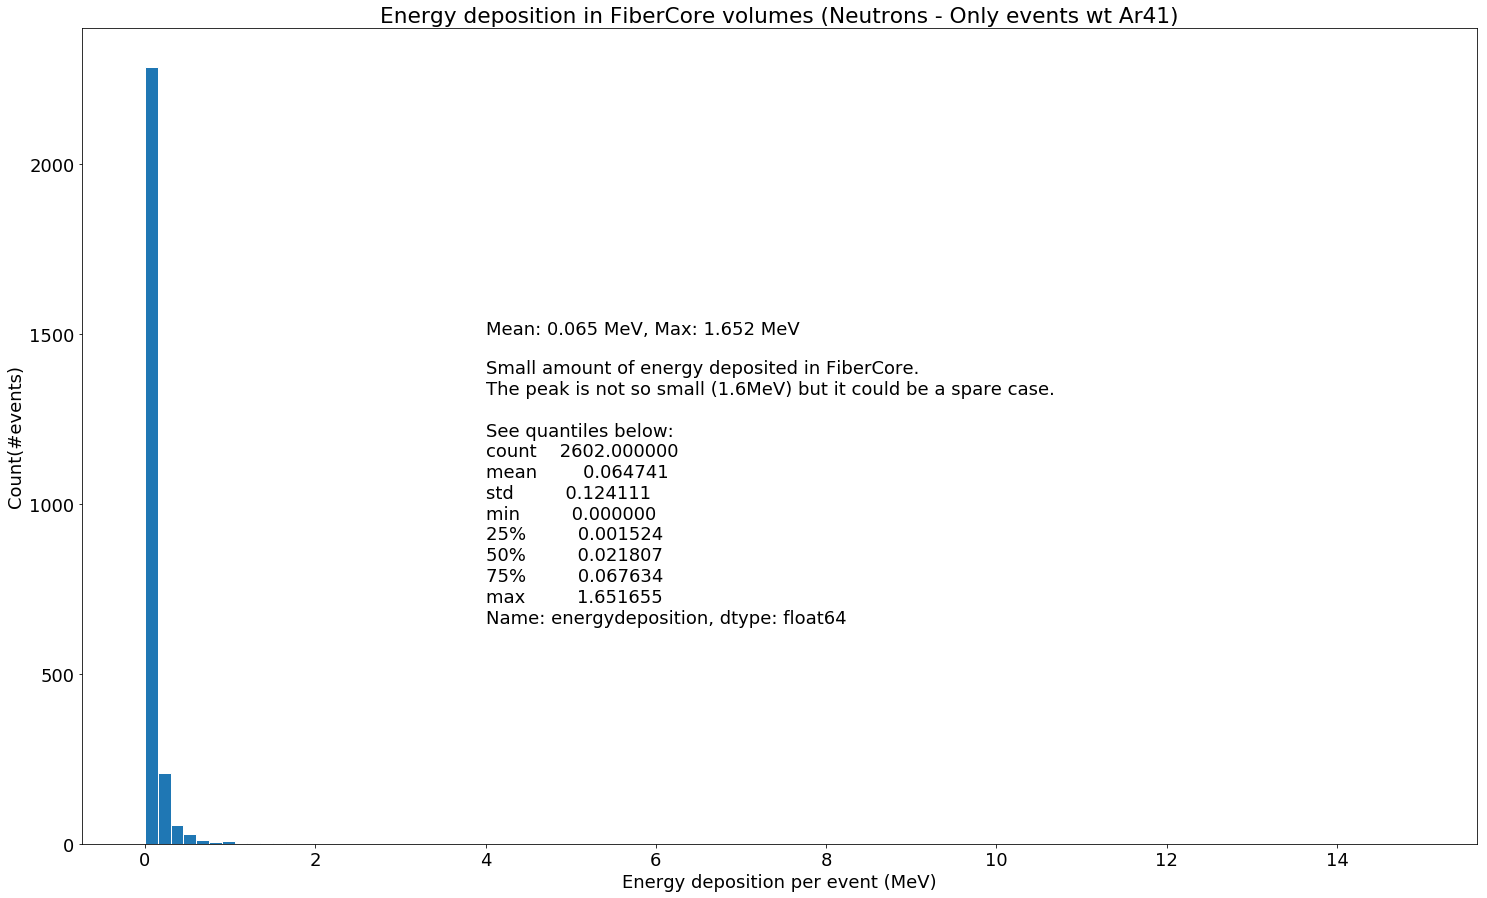

In [57]:
plt.hist(edepfib_gby_event, bins=bins, label="Deposit in LAr", edgecolor='w')
plt.xlabel("Energy deposition per event (MeV)")
plt.ylabel("Count(#events)")
plt.title("Energy deposition in FiberCore volumes (Neutrons - Only events wt Ar41)")
plt.text(4, 1500, "Mean: {:.3f} MeV, Max: {:.3f} MeV".format(edepfib_gby_event.mean(), edepfib_gby_event.max()))
plt.text(4, 1200, "Small amount of energy deposited in FiberCore.\nThe peak is not so small (1.6MeV) but it could be a spare case.\n\nSee quantiles below:")
plt.text(4, 650, "{}".format(edepfib_gby_event.describe()))
plt.show()

# Conclusions:
1. Do we really need to simulate the fiber core? Maybe we can save resources by recording only LAr entries.